In [3]:
## Import additional libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Import the dataset from local files

from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [6]:
## Read the dataset
df = pd.read_csv('titanic.csv')

In [ ]:
## Check shape of the data
df.shape

(891, 12)

In [ ]:
## Previewing the Data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## Listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
df['Embarked'].fillna('S', inplace=True)

In [ ]:
## Drop the cabin columns bcz more than 70% values is Nul values.
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# **Changing the data types for the following cols**

In [ ]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['SibSp'] = df['SibSp'].astype('category')
df['Cabin'] = df['Cabin'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     891 non-null    category
dtypes: category(5), float64(2), int64(2), object(3)
memory usage: 60.0+ KB


## Filling the age column with median function

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Age,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.381594,32.204208
std,257.353842,13.002015,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,7.910400
50%,446.000000,29.699118,0.000000,14.454200
75%,668.500000,35.000000,0.000000,31.000000
max,891.000000,80.000000,6.000000,512.329200


<ipython-input-9-94a186a71f93>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survived', data=df,palette='deep')


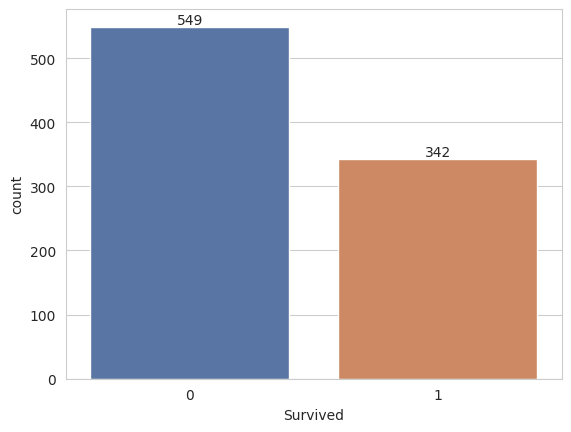

In [9]:
ax = sns.countplot(x='Survived', data=df,palette='deep')
for container in ax.containers:
    ax.bar_label(container)
sns.set_style('whitegrid')

<ipython-input-10-baf200b764e3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Pclass',data=df,palette='deep')


Text(0.5, 1.0, 'Passenger Class')

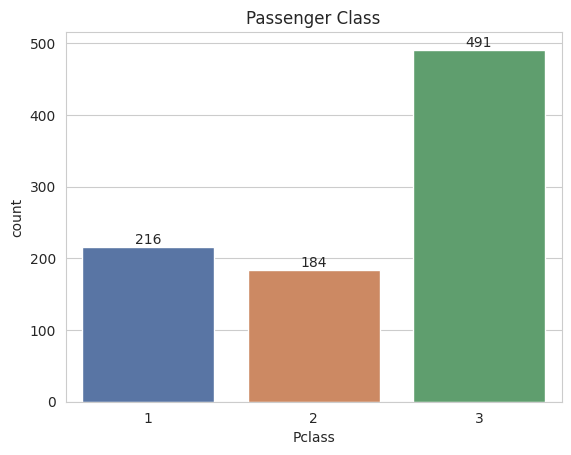

In [10]:
ax = sns.countplot(x='Pclass',data=df,palette='deep')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Passenger Class')

<ipython-input-11-240697633902>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sex',data=df,palette='deep')


Text(0.5, 1.0, 'Sex')

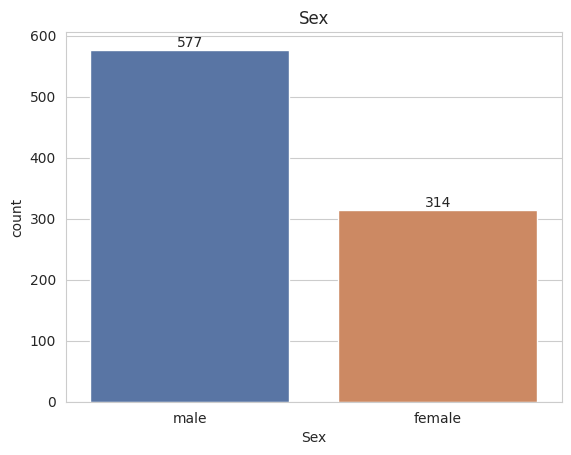

In [11]:
ax = sns.countplot(x='Sex',data=df,palette='deep')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Sex')

<ipython-input-12-064f56c81850>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='SibSp',data=df,palette='deep')


Text(0.5, 1.0, 'SibSp')

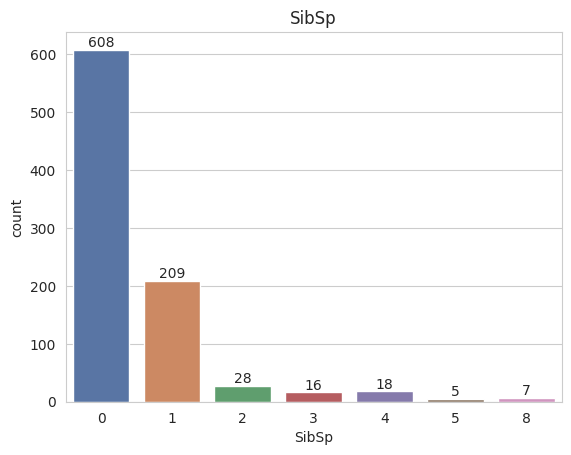

In [12]:
ax = sns.countplot(x='SibSp',data=df,palette='deep')
for container in ax.containers:
    ax.bar_label(container)
plt.title('SibSp')

<ipython-input-13-5e1652c9cace>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Parch',data=df,palette='deep')


Text(0.5, 1.0, 'Parch')

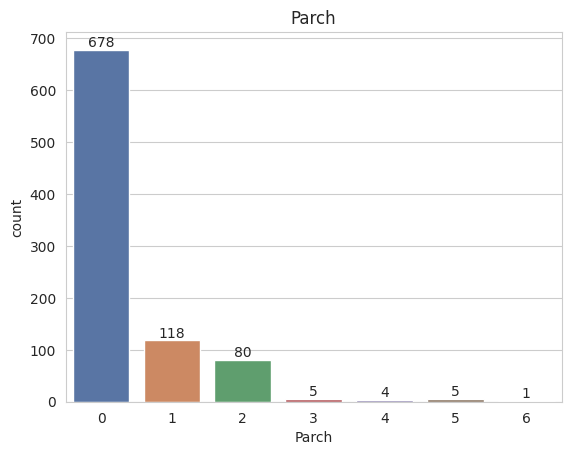

In [13]:
ax = sns.countplot(x='Parch',data=df,palette='deep')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Parch')

<ipython-input-16-531bc0d9fdbb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Embarked',data=df,palette='deep')


Text(0.5, 1.0, 'Embarked')

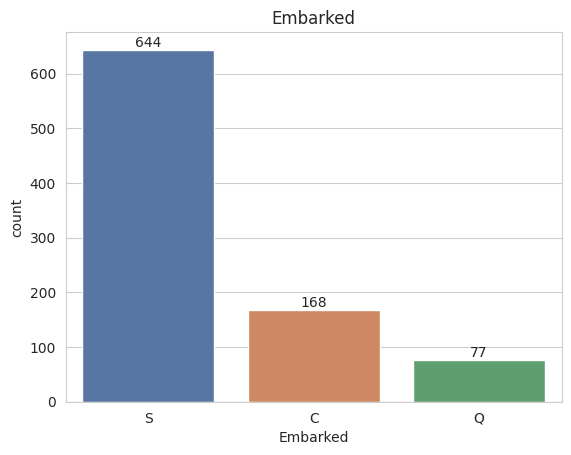

In [16]:
ax = sns.countplot(x='Embarked',data=df,palette='deep')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Embarked')

<ipython-input-94-cf0334540b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

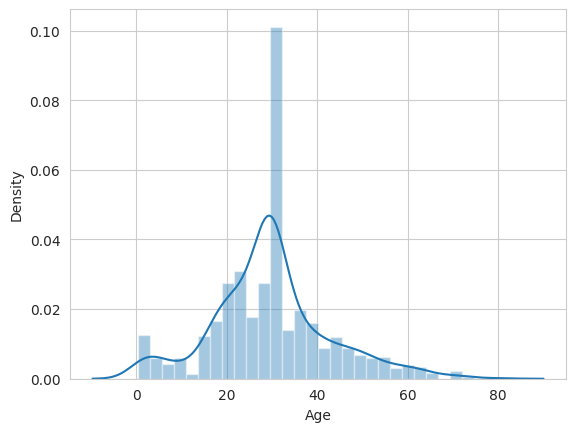

In [ ]:
sns.distplot(df["Age"])

<Axes: xlabel='Age'>

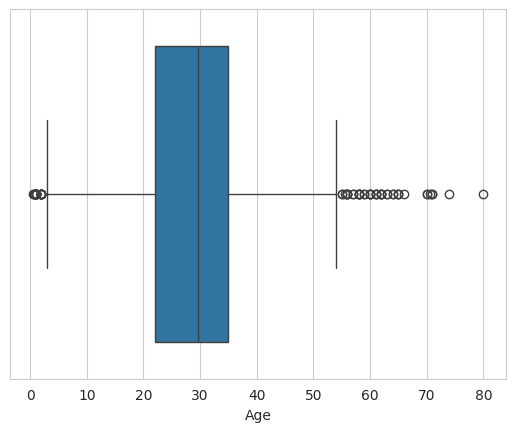

In [ ]:
sns.boxplot(x=df["Age"])

<ipython-input-100-9db33f8d1852>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Fare'])


<Axes: ylabel='Density'>

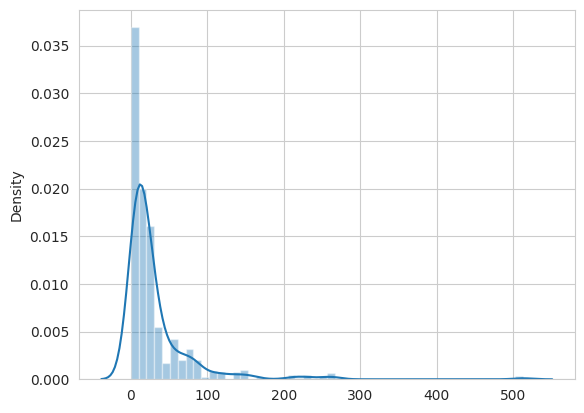

In [ ]:
# Fare column

sns.distplot(x=df['Fare'])

<Axes: xlabel='Fare'>

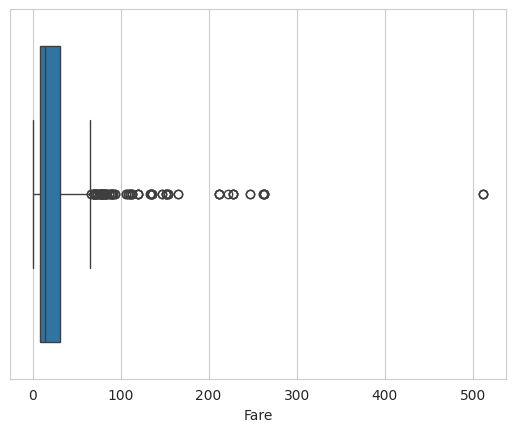

In [ ]:
sns.boxplot(x=df['Fare'])